In [3]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

from dimensionality_reduction import run_dimensionality_reduction, plot_embeddings
from scipy.io import arff
import time

# Load and process data

In [4]:
# Load the data into a Pandas DataFrame
data_eeg_eyestate = arff.loadarff('./data/EEG Eye State.arff')
df_eeg_eyestate = pd.DataFrame(data_eeg_eyestate[0])

# turn the eyeDetection column into a binary column
# df_eeg_eyestate['eyeDetection'] = df_eeg_eyestate['eyeDetection'].map({b'0': 0, b'1': 1})

# Define the features and target
X = df_eeg_eyestate.drop('eyeDetection', axis=1)
y = df_eeg_eyestate['eyeDetection']

# Converts eyeDetection to int
y = y.astype(int)

In [5]:
# Randomize the data
X = X.sample(frac=1, random_state=0)
y = y.sample(frac=1, random_state=0)

In [6]:
class Dataset:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

In [7]:
eye_dataset = Dataset(*train_test_split(X, y, test_size=0.3, random_state=42))

In [8]:
# Define the classifiers you want to test
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('XGBoost', XGBClassifier()),
]

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', None)
])

In [9]:
def run_pipeline(dataset, pipeline, classifier_name, classifier):
    start_time = time.time()
    pipeline.set_params(classifier=classifier)

    pipeline.fit(dataset.X_train, dataset.y_train)
    y_pred = pipeline.predict(dataset.X_test)

    cm = confusion_matrix(dataset.y_test, y_pred)
    accuracy = accuracy_score(dataset.y_test, y_pred)
    precision = precision_score(dataset.y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(dataset.y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(dataset.y_test, y_pred, average='weighted', zero_division=0)
    end_time = time.time()

    return classifier_name, accuracy, precision, recall, f1, end_time - start_time


def test_classifiers(dataset, pipeline, classifiers):
    print("{:<20} {:<8} {:<8} {:<8} {:<8} {:<8}".format("Model", "Accuracy", "Precision", "Recall", "F1", "Time"))

    for classifier_name, classifier in classifiers:
        name, accuracy, precision, recall, f1, time_taken = run_pipeline(dataset, pipeline, classifier_name, classifier)
        print("{:<20} {:.3f}    {:.3f}    {:.3f}    {:.3f}    {:.3f}".format(name, accuracy, precision, recall, f1, time_taken))


In [10]:
test_classifiers(eye_dataset, pipeline, classifiers)

Model                Accuracy Precision Recall   F1       Time    
Logistic Regression  0.589    0.582    0.589    0.572    0.043
K-Nearest Neighbors  0.832    0.832    0.832    0.832    0.195
Decision Tree        0.829    0.829    0.829    0.829    0.085
Random Forest        0.927    0.927    0.927    0.926    1.342
SVM                  0.626    0.655    0.626    0.578    3.164
Naive Bayes          0.444    0.470    0.444    0.294    0.009
AdaBoost             0.745    0.744    0.745    0.743    0.412
Gradient Boosting    0.819    0.821    0.819    0.818    1.761
Extra Trees          0.949    0.950    0.949    0.949    0.741
XGBoost              0.930    0.930    0.930    0.930    1.176


# Dimensionality reduction visualization

Running PCA
Running UMAP


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


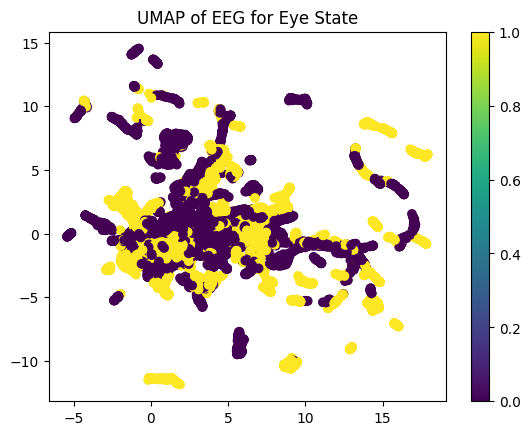

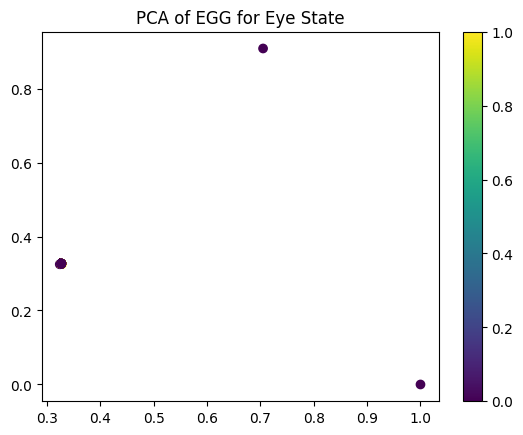

In [11]:
reductions = run_dimensionality_reduction(X.to_numpy())

plot_embeddings(reductions["umap2"], y, 'UMAP of EEG for Eye State')
plot_embeddings(reductions["pca5"], y, 'PCA of EGG for Eye State')

<AxesSubplot: xlabel='O1', ylabel='O2'>

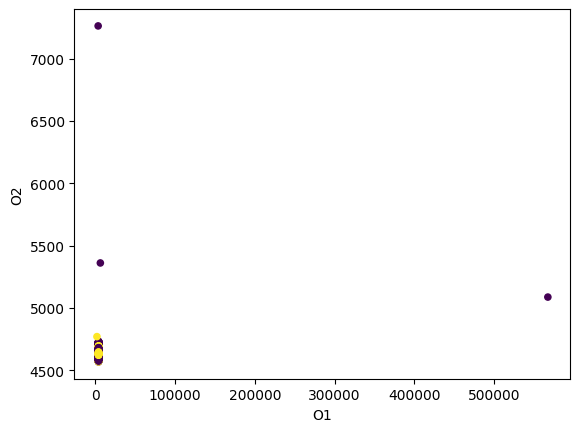

In [14]:
# Plots O2 againts O1 and colors with eyeDetection. Drops outliers first